In [1]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf
import time
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
 # load american gut data
data_pickle = pickle.load(open("/data/dv292/ag.p","rb"))
counts = data_pickle[0]
counts_norm = counts / np.sum(counts, axis=1, keepdims=True)
counts_norm = np.sqrt(counts_norm)
#counts_norm = counts_norm / np.max(counts_norm)
#counts_norm = (counts_norm * 2) - 1
print(np.min(counts_norm))
print(np.max(counts_norm))

0.0
0.577350269189722


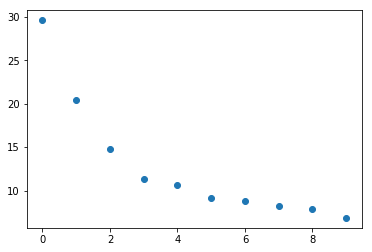

In [77]:
data, X_mu, U, S = AAnet.AAnet.pcasvd([], counts_norm, k=10)
S.shape
plt.scatter(range(10), S)
plt.show()

In [78]:
np.std(data, axis=0)

array([0.29880595, 0.20596786, 0.14886966, 0.11447229, 0.10797631,
       0.0922183 , 0.08867486, 0.08328237, 0.07979236, 0.06929513])

In [79]:
data = data / np.std(data[:,0])

In [80]:
np.std(data, axis=0)

array([1.        , 0.68930308, 0.49821518, 0.38309911, 0.36135929,
       0.30862271, 0.29676403, 0.27871725, 0.2670374 , 0.23190679])

In [71]:
#data = counts_norm

In [72]:
_,idx = np.unique(data_pickle[2], return_inverse=True)

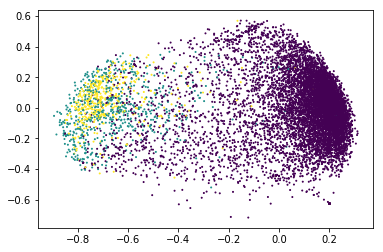

In [76]:
# plot PCA
plt.scatter(data[:,0], data[:,1], s=1, c=idx)
plt.show()

In [55]:
# params
num_at = 5
noise_z_std = 0.05
z_dim = [256,128,64,32]
#z_dim = []
act_out = None # linear last layer
#act_out = tf.nn.tanh
input_dim = data.shape[1]

In [56]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [57]:
# train
model.train(data, batch_size=2048, num_batches=10000)

Iter [       0] Time [0.1929] loss [0.9948]
Iter [     500] Time [2.7509] loss [0.0023]
Iter [    1000] Time [5.3158] loss [0.0019]
Iter [    1500] Time [7.8559] loss [0.0019]
Iter [    2000] Time [10.4250] loss [0.0017]
Iter [    2500] Time [12.9828] loss [0.0017]
Iter [    3000] Time [15.5990] loss [0.0016]
Iter [    3500] Time [18.1912] loss [0.0014]
Iter [    4000] Time [20.8612] loss [0.0015]
Iter [    4500] Time [23.4616] loss [0.0015]
Iter [    5000] Time [26.0598] loss [0.0022]
Iter [    5500] Time [28.5952] loss [0.0014]
Iter [    6000] Time [31.2174] loss [0.0020]
Iter [    6500] Time [33.8598] loss [0.0013]
Iter [    7000] Time [36.4769] loss [0.0013]
Iter [    7500] Time [38.9198] loss [0.0013]
Iter [    8000] Time [41.4864] loss [0.0013]
Iter [    8500] Time [44.1122] loss [0.0013]
Iter [    9000] Time [46.7393] loss [0.0012]
Iter [    9500] Time [49.3262] loss [0.0013]
Iter [    9999] Time [51.8931] loss [0.0014]
done.


In [58]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.0014


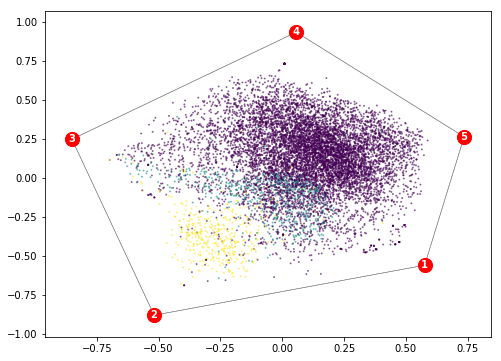

In [59]:
model.plot_at_mds(data, c=idx)

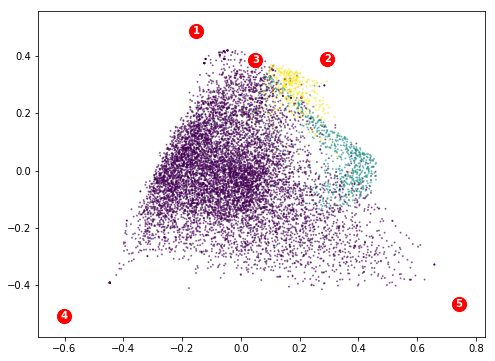

In [60]:
model.plot_at_pca_single(data, c=idx)

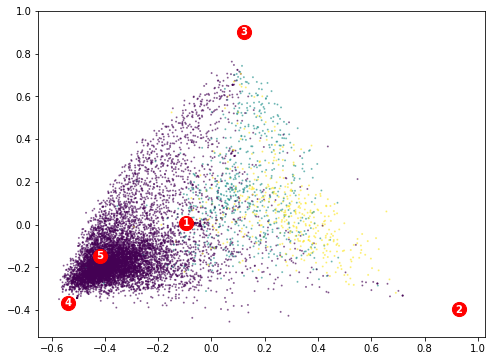

In [61]:
model.plot_pca_ats_data(data, c=idx)

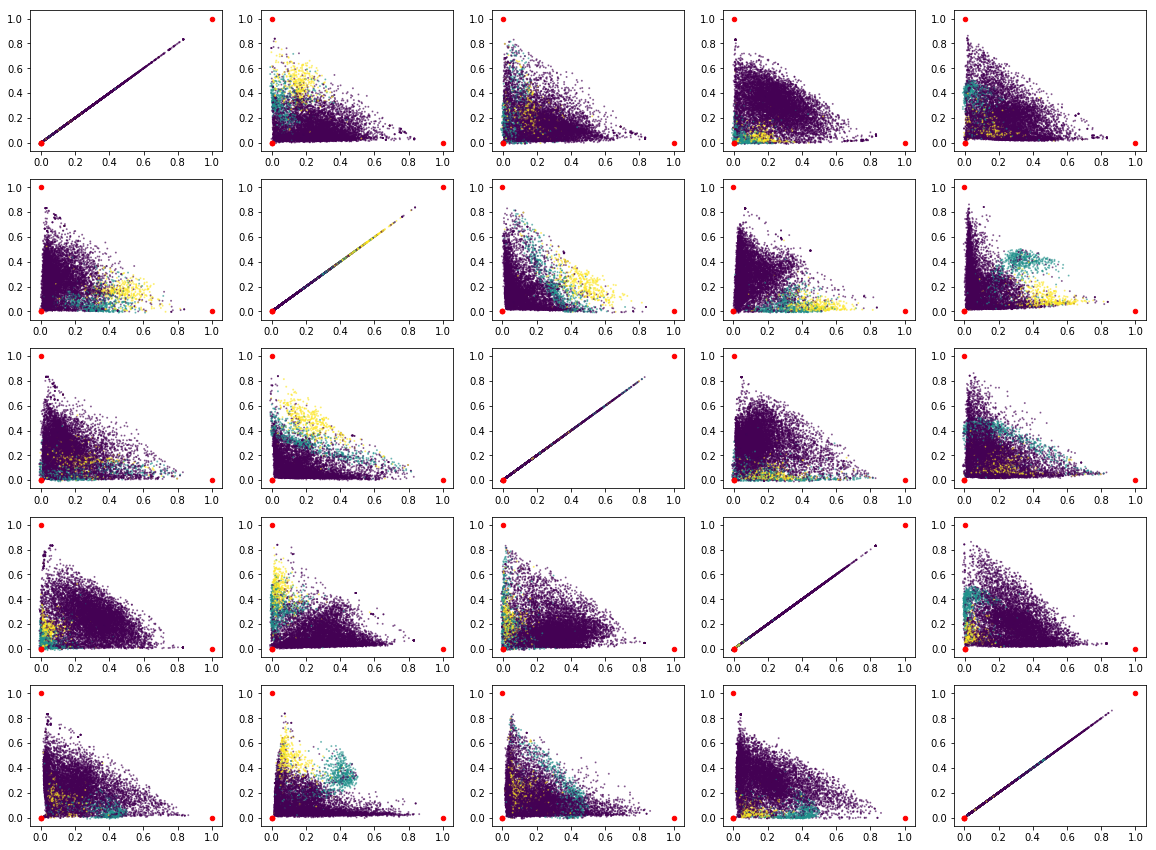

In [62]:
model.plot_at(data, c=idx)

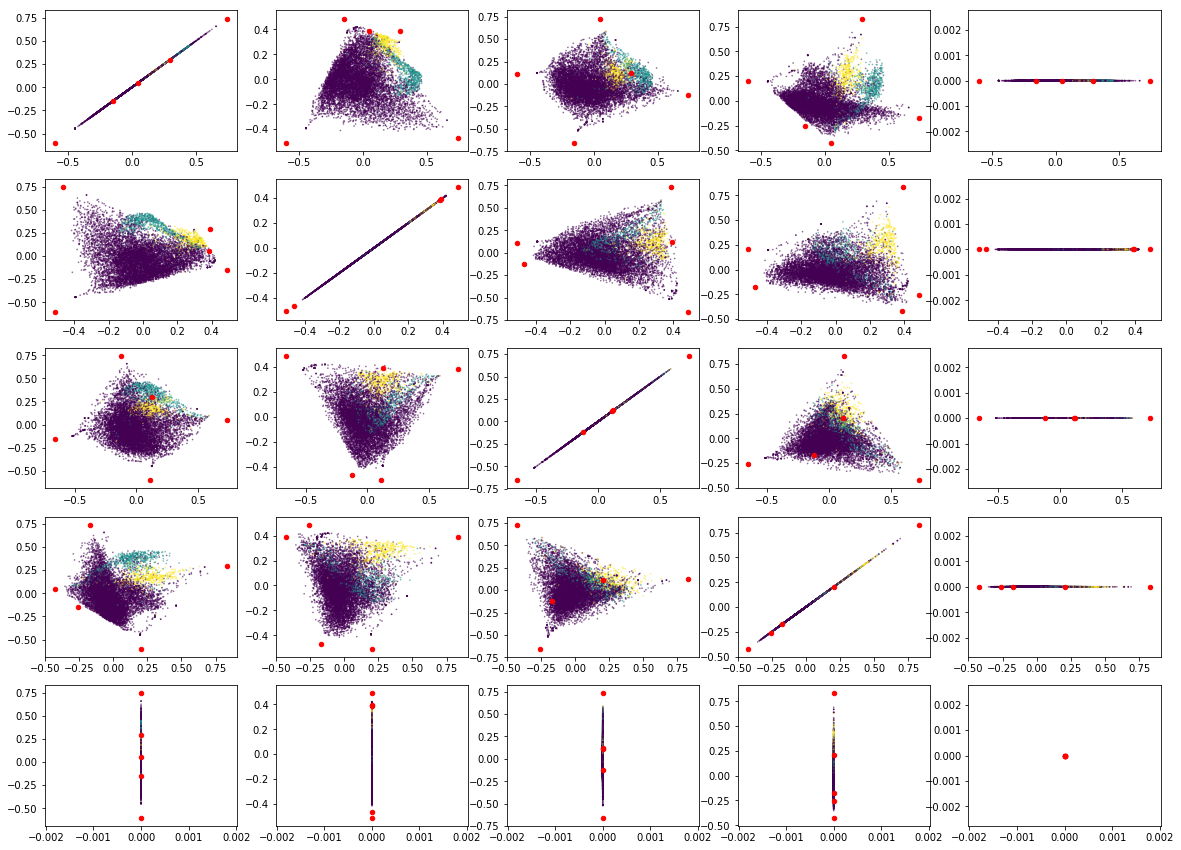

In [63]:
model.plot_at_pca(data, c=idx)

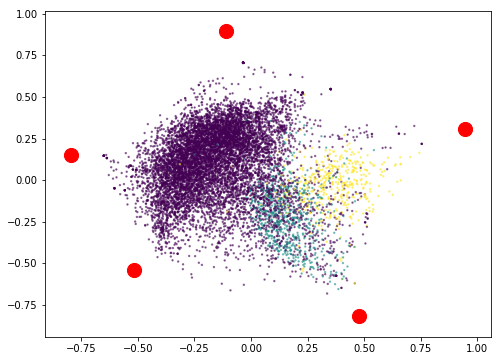

In [64]:
# MDS on z
ats_x = model.get_ats_x()
data_at = model.data2at(data)
embedding = MDS(n_components=2)
Y_mds_ats = embedding.fit_transform(ats_x)
Y_mds_data = data_at @ Y_mds_ats

fig = plt.figure(figsize=(8, 6))
plt.scatter(Y_mds_data[:,0], Y_mds_data[:,1], s=2, alpha=0.5, c=idx)
plt.scatter(Y_mds_ats[:,0], Y_mds_ats[:,1], s=200, alpha=1, c='r')
plt.show()

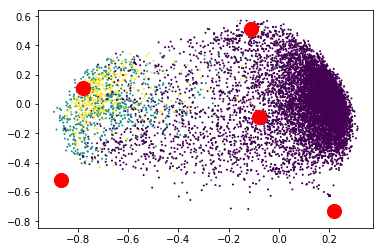

In [65]:
# plot PCA with ATs
ats_x = model.get_ats_x()
plt.scatter(data[:,0], data[:,1], s=1, c=idx)
plt.scatter(ats_x[:,0], ats_x[:,1], s=200, alpha=1, c='r')
plt.show()

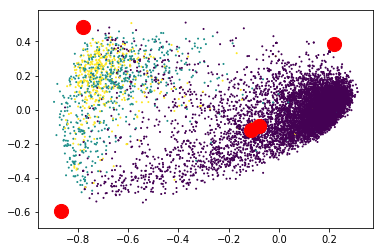

In [66]:
# plot PCA with ATs
plt.scatter(data[:,0], data[:,2], s=1, c=idx)
plt.scatter(ats_x[:,0], ats_x[:,2], s=200, alpha=1, c='r')
plt.show()

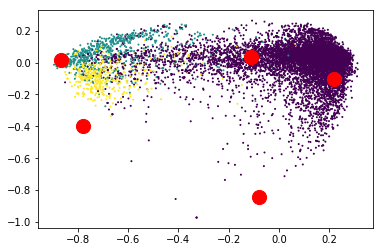

In [67]:
# plot PCA with ATs
plt.scatter(data[:,0], data[:,3], s=1, c=idx)
plt.scatter(ats_x[:,0], ats_x[:,3], s=200, alpha=1, c='r')
plt.show()

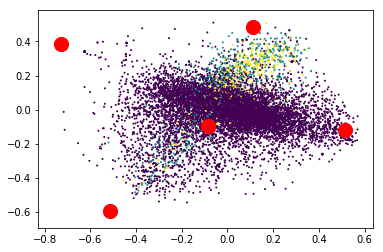

In [68]:
# plot PCA with ATs
plt.scatter(data[:,1], data[:,2], s=1, c=idx)
plt.scatter(ats_x[:,1], ats_x[:,2], s=200, alpha=1, c='r')
plt.show()

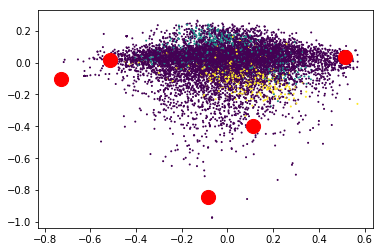

In [69]:
# plot PCA with ATs
plt.scatter(data[:,1], data[:,3], s=1, c=idx)
plt.scatter(ats_x[:,1], ats_x[:,3], s=200, alpha=1, c='r')
plt.show()